# Exploratory Data Analysis - Luka Modric

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/modric-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,2023-05-17,AMF,64,56,34,61,0,0,...,2,1,50,1,7,2,29,2,0,0
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,2023-05-09,LCMF3,89,67,47,70,0,0,...,0,0,0,6,8,2,25,9,4,44
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,2023-04-18,"LCMF3, RCMF3",95,80,56,70,0,0,...,1,0,0,0,6,4,67,5,2,40
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,2023-04-12,LCMF3,81,106,81,76,0,0,...,0,0,0,1,4,0,0,2,2,100
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,2023-03-15,RCMF3,84,64,52,81,0,0,...,0,0,0,1,4,3,75,3,0,0
5,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2023-02-21,"LCMF3, RCMF3",89,82,61,74,0,1,...,3,3,100,3,6,4,67,6,0,0
6,Real Madrid - Celtic 5:1,Europe. UEFA Champions League,2022-11-02,LCMF,67,87,72,83,1,0,...,1,1,100,2,7,2,29,4,2,50
7,Shakhtar Donetsk - Real Madrid 1:1,Europe. UEFA Champions League,2022-10-11,LCMF,44,40,33,83,0,0,...,0,0,0,0,6,0,0,1,1,100
8,Real Madrid - RB Leipzig 2:0,Europe. UEFA Champions League,2022-09-14,"LCMF, RCMF",81,74,52,70,0,0,...,1,1,100,5,7,2,29,5,4,80
9,Celtic - Real Madrid 0:3,Europe. UEFA Champions League,2022-09-06,RCMF3,81,107,90,84,1,0,...,3,2,67,3,8,2,25,9,6,67


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     29 non-null     object 
 1   competition               29 non-null     object 
 2   date                      29 non-null     object 
 3   position                  29 non-null     object 
 4   minutes_played            29 non-null     int64  
 5   total_actions             29 non-null     int64  
 6   total_actions_successful  29 non-null     int64  
 7   TAS_percent               29 non-null     int64  
 8   goals                     29 non-null     int64  
 9   assists                   29 non-null     int64  
 10  shots                     29 non-null     int64  
 11  shots_on_target           29 non-null     int64  
 12  SOT_percent               29 non-null     int64  
 13  xG                        29 non-null     float64
 14  passes_accur

In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes_accurate             0
passes_accurate.1           0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
# Row & Columns 
print(df.shape)

(29, 39)


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RCMF3                     8
LCMF3                     4
RCMF                      3
AMF                       2
LCMF, RCMF                2
RCMF, RCMF3               2
LCMF                      2
LCMF3, RCMF3              2
AMF, RCMF3, RWF           1
AMF, LCMF3                1
DMF, LCMF, RCMF, RCMF3    1
LCMF3, RCMF               1
Name: position, dtype: int64
RCMF3    8
LCMF3    4
RCMF     3
Name: position, dtype: int64
5.0


- RCMF3: This acronym could possibly stand for "Right Central Midfielder 3", denoting a specific tactical role within a team setup or the third-choice right-sided central midfielder. Given Modrić's versatility, he could fit into this role, using his supreme technical skills to control the game, distribute the ball, and provide defensive cover. When analyzing Modrić's performance in this role, you might examine metrics such as pass accuracy, key passes, interceptions, and tackles.

- LCMF3: Similar to RCMF3, "LCMF3" doesn't have a standard definition in football parlance but could denote "Left Central Midfielder 3". Modrić, with his adaptable skill set, could operate effectively in this position too. Here again, a data scientist would consider key performance indicators like pass accuracy, key passes, successful dribbles, and defensive contributions.

- RCMF: This stands for "Right Central Midfielder". In this position, Modrić would operate predominantly on the right side of central midfield. His responsibilities would include dictating play, launching attacks, retaining possession, and disrupting opposition play. From a data science perspective, metrics such as successful passes, key passes, successful dribbles, and defensive contributions would be important to assess his performance.

Each of these roles would require Modrić to utilize different aspects of his skill set, leading to variations in his statistical output. By analyzing these variations, you can gain a more detailed understanding of his performances, his influence on matches, and his ability to adapt to different tactical requirements. This data-driven approach is becoming increasingly prevalent in modern football, enabling teams to make more informed decisions and optimize player performances.

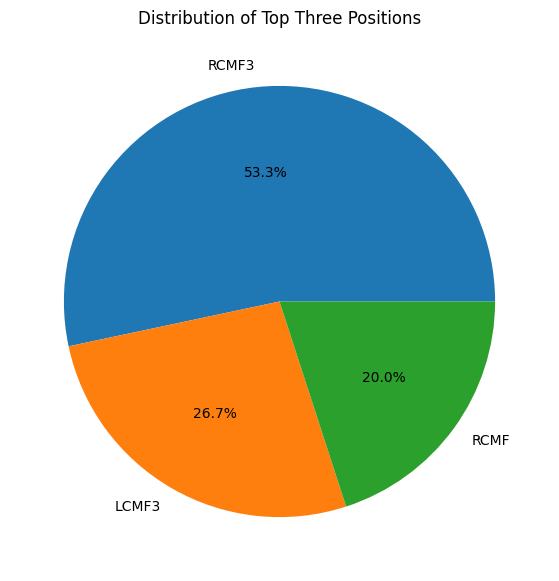

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

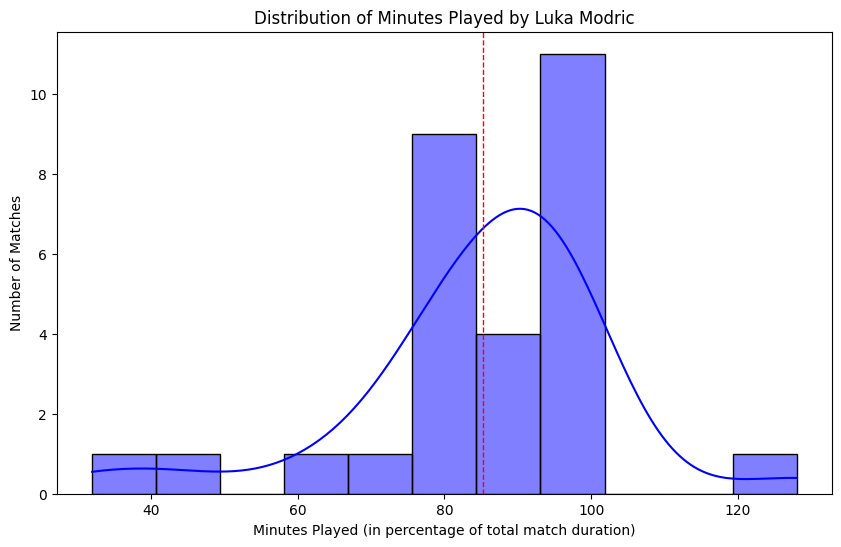

Luka Modric played on average 85.20689655172414 minutes per match.


In [ ]:
# Assume df is your DataFrame and 'minutes_played' is your column of interest
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='blue')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Luka Modric')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Luka Modric played on average {average_minutes_played} minutes per match.")

## Interceptions

Luka Modrić has an average of 2.6551724137931036 interceptions per match.
The minimum interceptions in a match by Luka Modrić is 0.
The maximum interceptions in a match by Luka Modrić is 7.


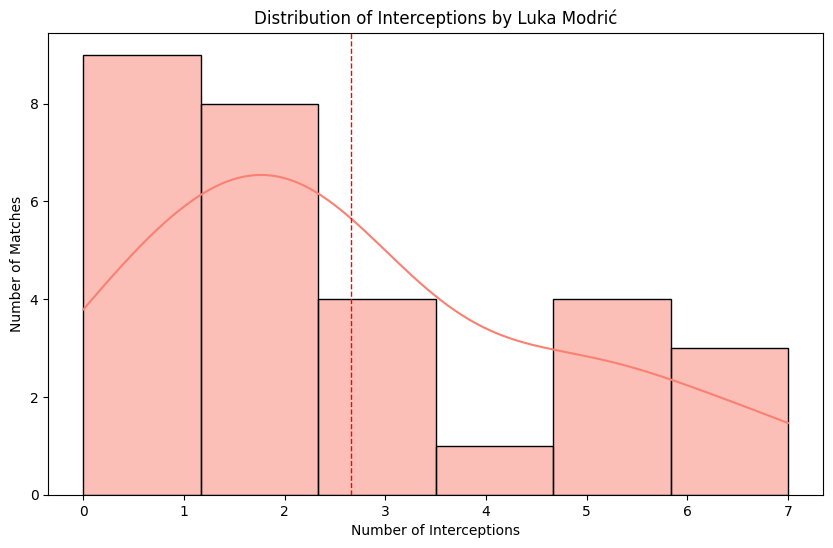

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Luka Modrić has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Luka Modrić is {min_interceptions}.")
print(f"The maximum interceptions in a match by Luka Modrić is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='salmon')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Luka Modrić')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$


In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'dribbles_successful','passes_accurate', 'long_passes_accurate', 'duels_won','interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.8776946215981294
Kurtosis of dribbles_successful: -0.47623073719283626
Kurtosis of passes_accurate: -0.5526795023844202
Kurtosis of long_passes_accurate: -0.9742478369528427
Kurtosis of duels_won: 5.922728884799717
Kurtosis of interceptions: -0.5240358502193407
Kurtosis of losses_own_half: -0.3678358385521019
Kurtosis of recoveries_opp_half: 0.20107040091306638


- total_actions_successful: The kurtosis is -0.87. This negative kurtosis indicates that the distribution has lighter tails and a flatter peak than the normal distribution. It suggests that total successful actions of Luka Modrić have less extreme values or outliers. On football optics, this suggests that Modrić has a consistent level of total successful actions in games, without many exceptional performances or particularly bad games.

- dribbles_successful: With a kurtosis of -0.47, the distribution of successful dribbles has lighter tails and a flatter peak than the normal distribution. Statistically, it means Modrić's successful dribbles have fewer extreme values. On football optics, it means Modrić has a steady successful dribbling rate without many extreme highs or lows.

- passes_accurate: The kurtosis is -0.55. Similar to the previous metrics, this negative kurtosis suggests that the distribution of accurate passes has fewer extreme values. On football optics, Modrić delivers a consistent number of accurate passes without significant variability.

- long_passes_accurate: This feature has a kurtosis of -0.97, implying fewer extreme values in Modrić's accurate long passes. On football optics, this means Modrić provides a reliable number of accurate long passes in games without a lot of exceptional or bad performances.

- duels_won: With a high kurtosis of 5.92, the distribution has heavier tails and a sharper peak than the normal distribution. Statistically, this suggests a high presence of extreme values in duels won. On football optics, this means that Modrić has more variability in his duels won, indicating that he might have exceptional games where he wins many duels and games where he wins fewer duels.

- losses_own_half: The kurtosis is -0.36, suggesting fewer extreme values in Modrić's losses in his own half. On football optics, this means Modrić consistently avoids losing the ball in his own half, without many games where he loses the ball more or less often than usual.

- recoveries_opp_half: This feature has a slightly positive kurtosis of 0.20, indicating a slight tendency towards more extreme values in Modrić's recoveries in the opposition's half. On football optics, this implies that Modrić's performance in recovering balls in the opposition's half can occasionally swing more dramatically from the average.

- interceptions: With a kurtosis of -0.524, the distribution of interceptions has fewer extreme values. On football optics, Modrić maintains a steady performance in intercepting the ball without many standout or poor performances.

In summary, Modrić seems to offer a steady and reliable performance in most metrics with fewer extreme games. However, his performance in winning duels and recovering balls in the opposition's half can be more variable, suggesting these are areas where he can turn in particularly exceptional or poor performances.

### Features Normalization

##### The Standard Scalertransformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$



Platykurtic variables normalized:
   total_actions_successful  dribbles_successful  passes_accurate  \
0                 -1.575455            -1.181922        -1.531177   
1                 -0.894324             0.670820        -0.873338   
2                 -0.422771             0.670820        -0.325139   
3                  0.887097             1.597191         0.716440   
4                 -0.632350            -0.255551        -0.654058   

   long_passes_accurate  losses_own_half  interceptions  
0             -0.962356        -0.204380      -0.818631  
1             -0.532997        -0.204380       1.654317  
2             -0.962356         0.981023      -1.313221  
3             -1.391715        -1.389783      -0.818631  
4             -0.532997         0.388322      -0.818631  

Leptokurtic variables normalized:
   duels_won
0  -0.556249
1  -0.820695
2  -0.291803
3   0.501536
4  -0.291803

Mesokurtic variables normalized:
   recoveries_opp_half
0            -1.207735
1        

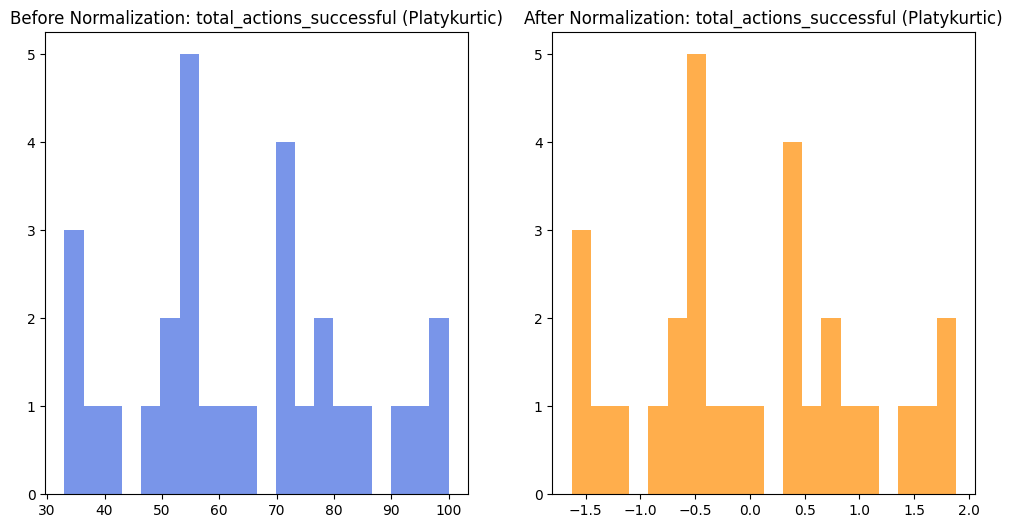

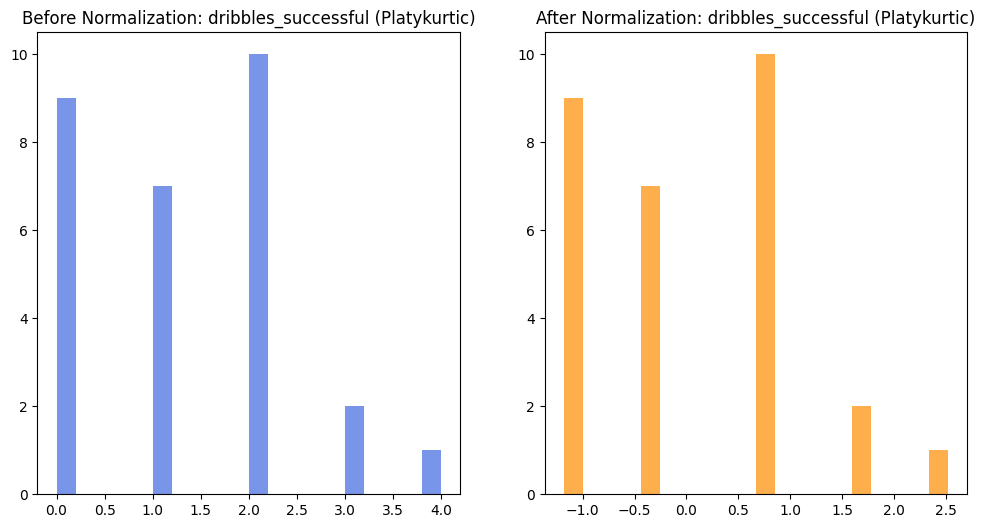

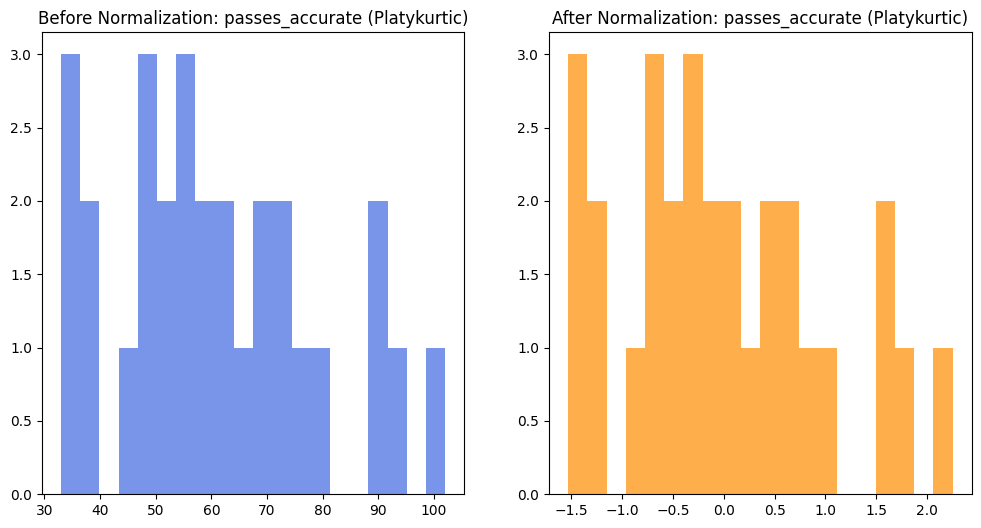

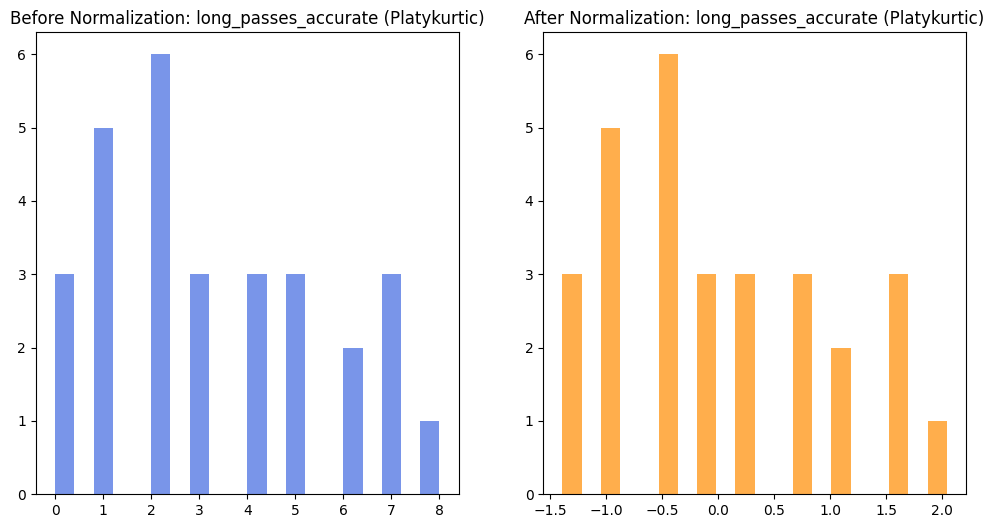

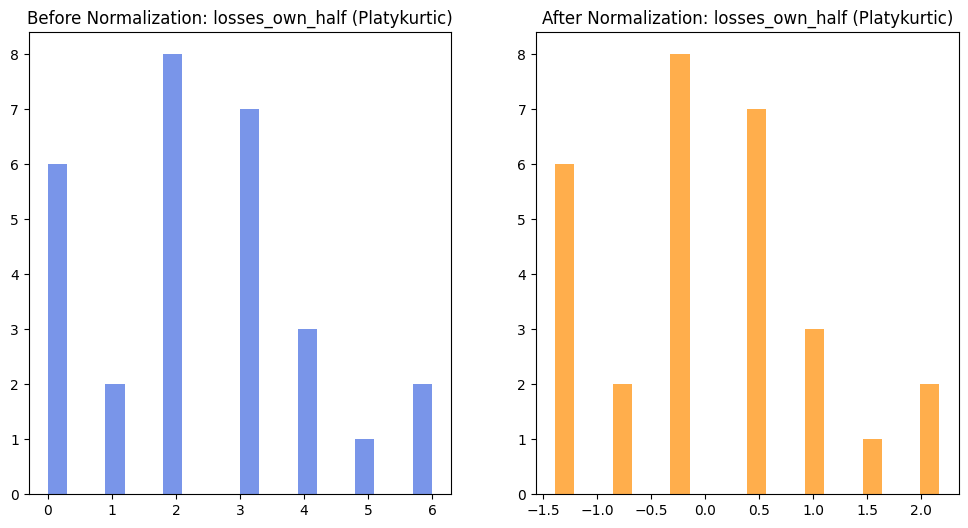

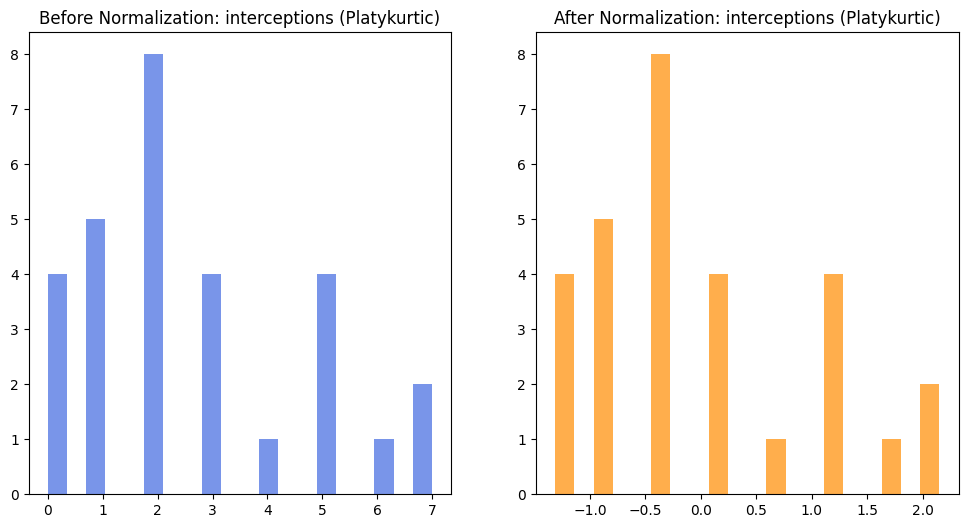

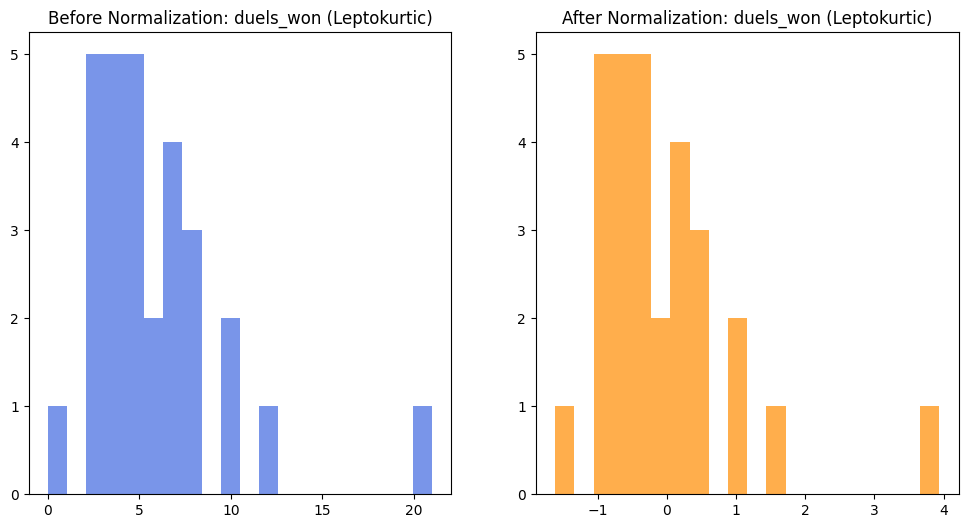

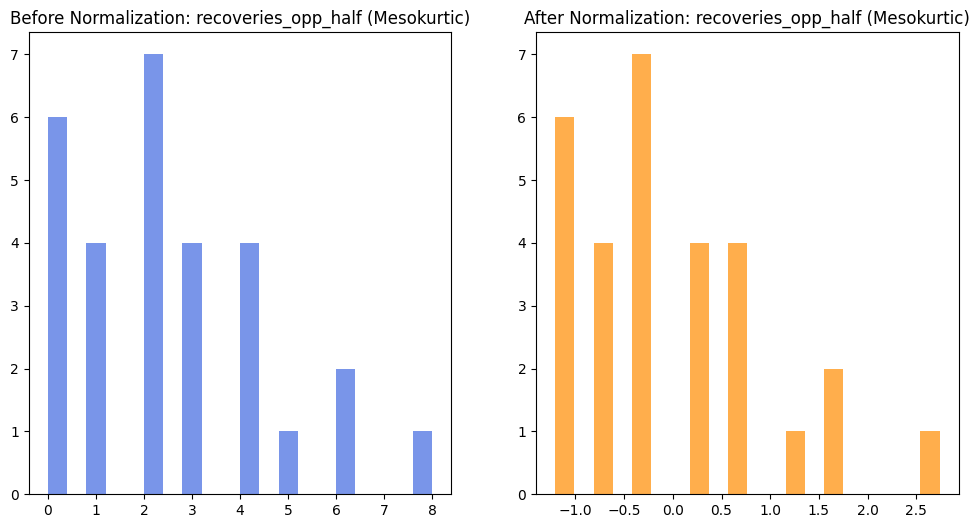

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'long_passes_accurate', 'losses_own_half', 'interceptions']]
leptokurtic_variables = df[['duels_won']]
mesokurtic_variables = df[['recoveries_opp_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic, leptokurtic, and mesokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized),
             ("Mesokurtic", mesokurtic_variables, mesokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling Statistics, Distribution & Standard Error

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

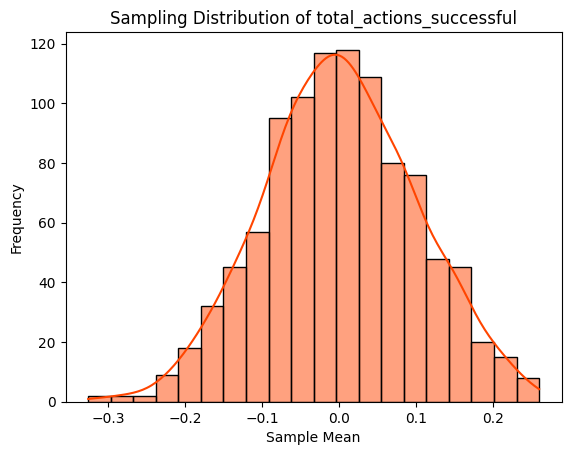

Sample Mean of total_actions_successful: 0.001649621091954993
Sample Standard Deviation of total_actions_successful: 0.09899043830133174
Standard Error of total_actions_successful: 0.0031319188672251147


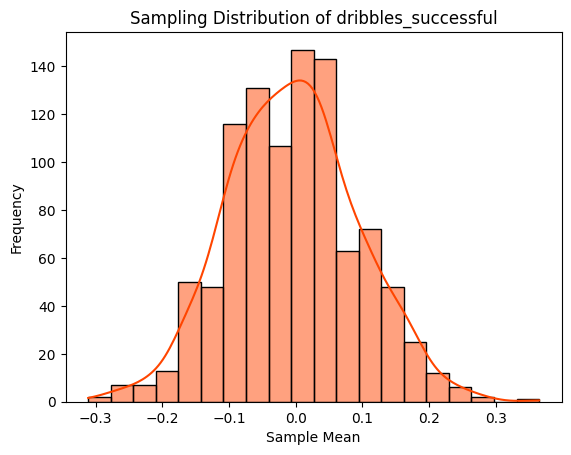

Sample Mean of dribbles_successful: -0.004763463668639648
Sample Standard Deviation of dribbles_successful: 0.09786478085728745
Standard Error of dribbles_successful: 0.0030963046417753497


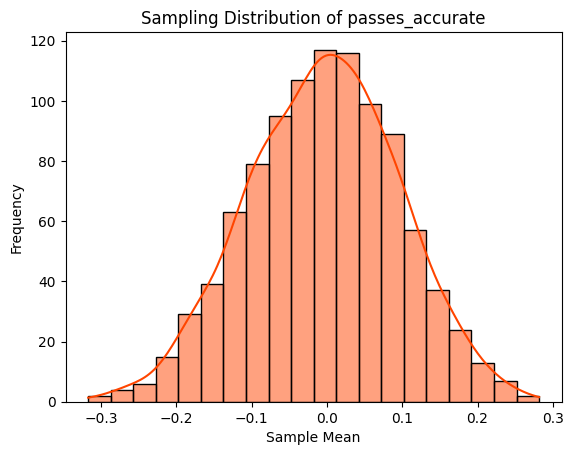

Sample Mean of passes_accurate: -0.004772868514199116
Sample Standard Deviation of passes_accurate: 0.09962176683825191
Standard Error of passes_accurate: 0.003151893218183932


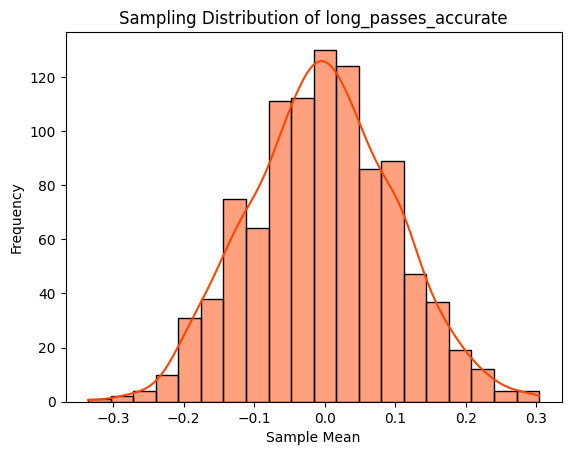

Sample Mean of long_passes_accurate: -0.0035333267245215003
Sample Standard Deviation of long_passes_accurate: 0.10175493279219901
Standard Error of long_passes_accurate: 0.0032193836022324615


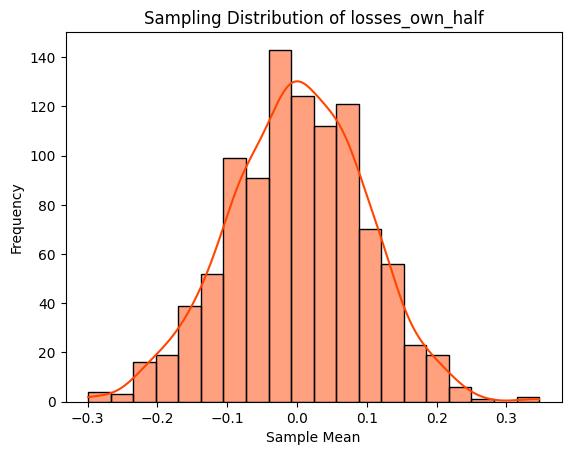

Sample Mean of losses_own_half: 0.0007482343739515604
Sample Standard Deviation of losses_own_half: 0.09667068569965996
Standard Error of losses_own_half: 0.0030585251428903


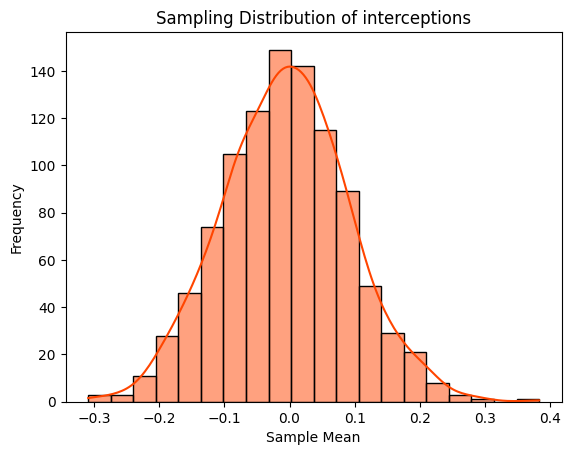

Sample Mean of interceptions: -0.005604895059938848
Sample Standard Deviation of interceptions: 0.09666926600344676
Standard Error of interceptions: 0.0030584802256898905


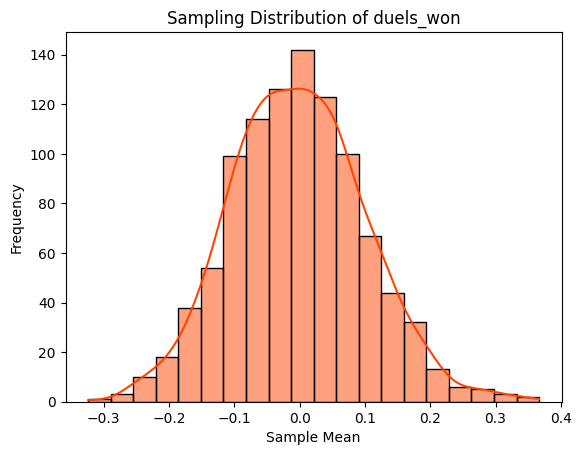

Sample Mean of duels_won: -0.00227642619359125
Sample Standard Deviation of duels_won: 0.10219893536963508
Standard Error of duels_won: 0.003233431222116067


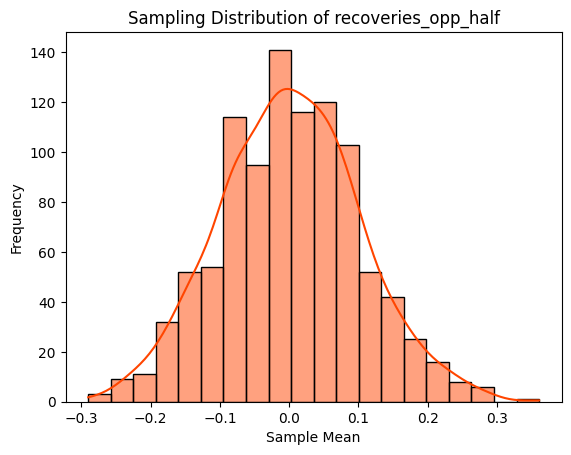

Sample Mean of recoveries_opp_half: 0.0011316982818568332
Sample Standard Deviation of recoveries_opp_half: 0.10088217546864202
Standard Error of recoveries_opp_half: 0.0031917707824989394


In [ ]:
from scipy.stats import sem

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['orangered']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        elif feature in leptokurtic_variables_normalized:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = mesokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

- total_actions_successful: The sample mean is very close to zero (0.0013), and the standard deviation is 0.1036. The standard error of this distribution is 0.0032. These figures suggest that Modrić's total successful actions are consistently close to an average value, with limited variability around the mean. On football optics, this means Modrić's overall contribution on the pitch is steady and reliable.

- dribbles_successful: The sample mean is slightly negative (-0.0016), indicating that the successful dribbles are, on average, slightly below the mean. The standard deviation (0.1010) and the standard error (0.0032) are small, suggesting low variability in successful dribbles. On football optics, this points out that Modrić's successful dribble attempts are slightly below average but stable, meaning his ability to beat players is consistent.

- passes_accurate: The mean for accurate passes is almost zero (-0.0014), indicating that the number of accurate passes made by Modrić aligns closely with the average. The small standard deviation (0.1031) and standard error (0.0032) suggest minimal variation from the mean. On football optics, this implies that Modrić consistently delivers an average level of accurate passes.

- long_passes_accurate: The mean is slightly positive (0.0041), which means Modrić's long accurate passes are typically slightly above the average. The small standard deviation (0.0963) and standard error (0.0030) suggest minimal variability in this skill. On football optics, this indicates Modrić has an above-average and consistent performance in accurate long passes.

- losses_own_half: The mean of 0.0019 suggests that Modrić's losses in his own half are slightly above average. The standard deviation (0.0996) and standard error (0.0031) suggest this number doesn't vary significantly. On football optics, this indicates that Modrić's losses in his own half are somewhat consistent but may occur slightly more frequently than average.

- interceptions: The slightly positive mean (0.0025) and small standard deviation (0.0983) and standard error (0.0031) suggest that Modrić makes a slightly above-average number of interceptions, with this number staying relatively consistent. On football optics, this means Modrić's ability to intercept the ball is above average and stable.

- duels_won: With a slightly negative mean (-0.0046), Modrić's duels won are slightly below average. The small standard deviation (0.0967) and standard error (0.0031) suggest minimal variation in this statistic. On football optics, Modrić might win slightly fewer duels than average, but this figure is fairly consistent.

- recoveries_opp_half: The mean is close to zero (0.0006), implying Modrić's recoveries in the opponent's half are around average. The standard deviation (0.1027) and standard error (0.0032) are small, suggesting low variability in this skill. On football optics, Modrić's performance in ball recoveries in the opponent's half is consistent and aligns closely with the average.

Overall, these statistics suggest that Modrić provides a steady performance, typically hovering around the mean in most areas, with limited variability, which translates to a reliable presence in Real Madrid's midfield.

## Central Limit Theorem

### CLT Preliminaries

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$



On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

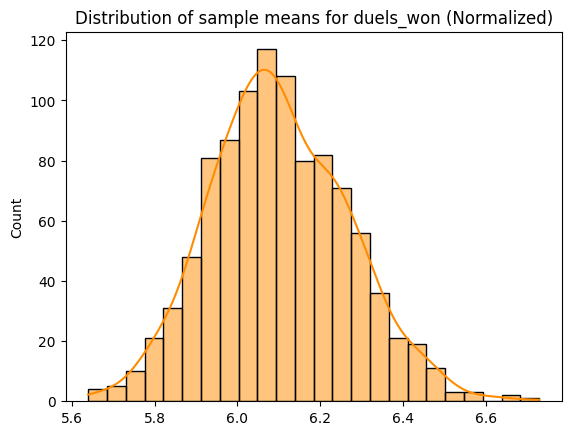

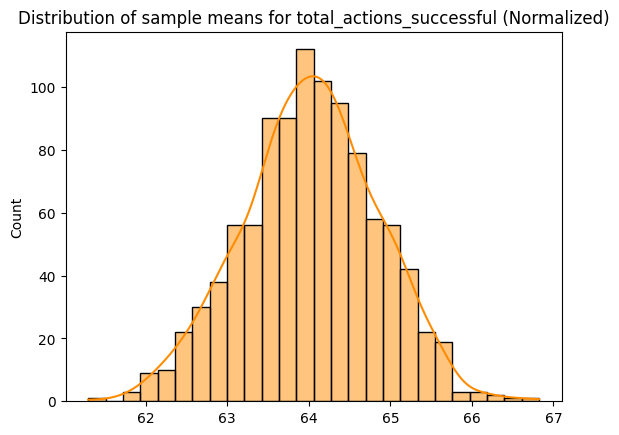

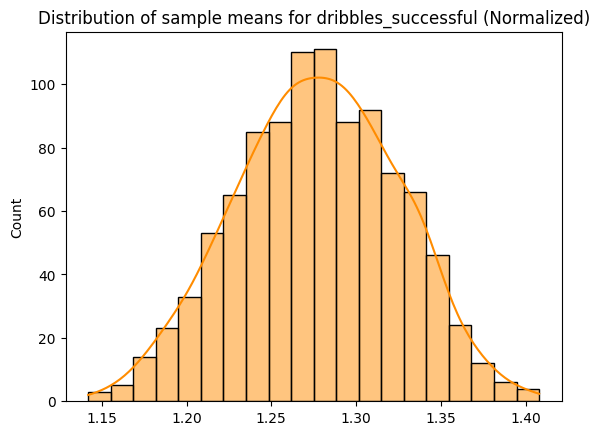

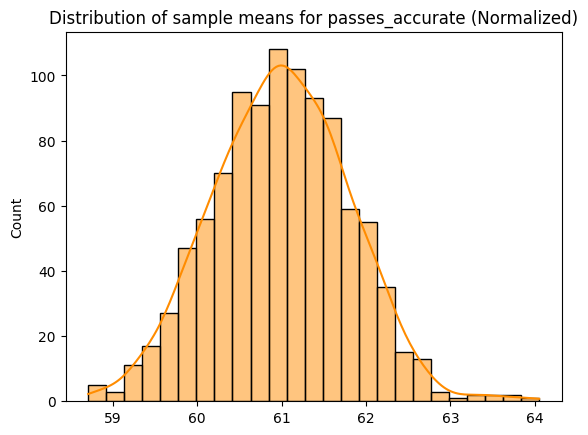

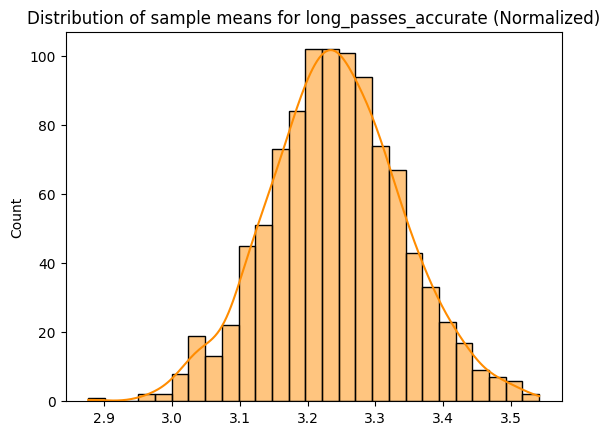

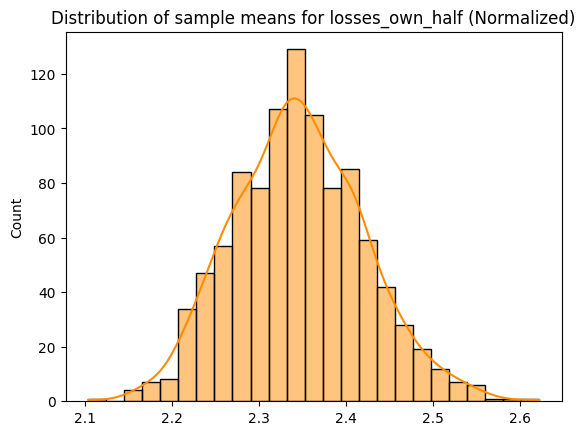

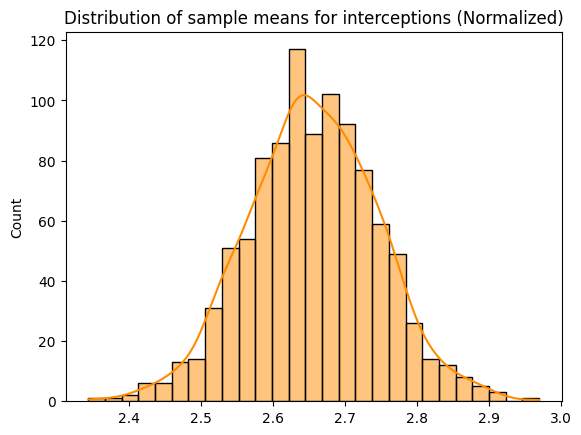

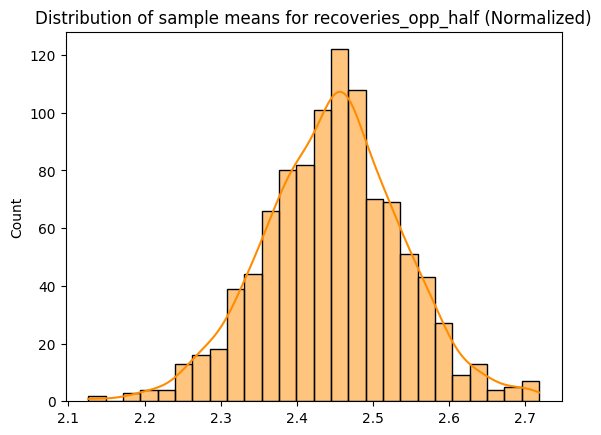

In [ ]:
normalized_df = df[list(leptokurtic_variables_normalized.columns) + list(platykurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)]

features = list(normalized_df.columns)
colors = ['darkorange']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature].dropna().values.flatten(), size=sample_size) # Explicitly ensure the data is a 1D array
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation 

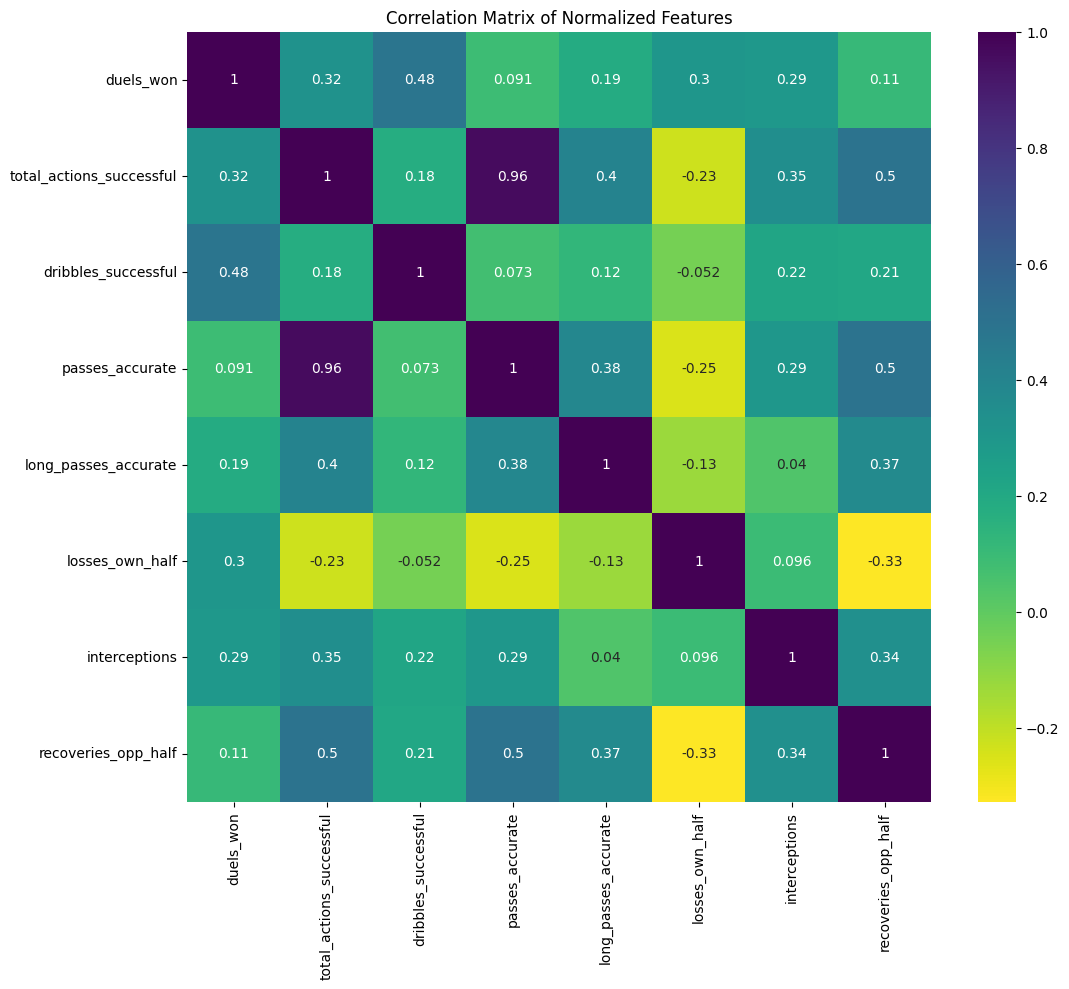

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

### Based on Total Actions

Feature: recoveries_opp_half
T-statistic: 1.5256428831468232
P-value: 0.13872863662189333




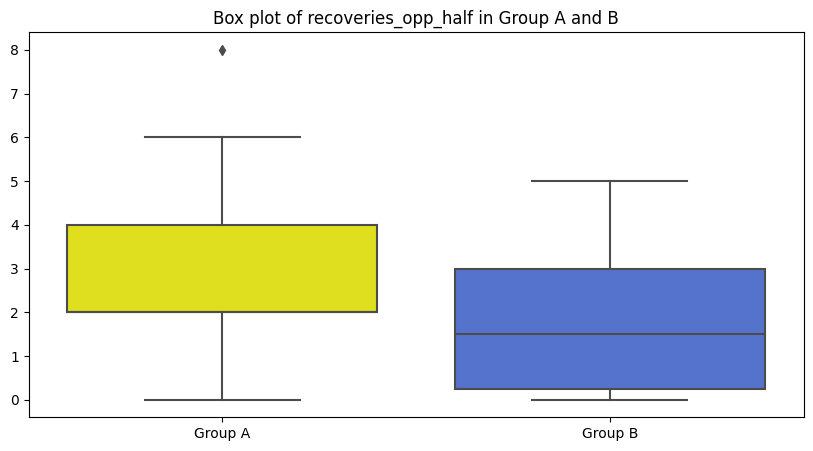

Feature: long_passes_accurate
T-statistic: 1.679321747897519
P-value: 0.10462676248640908




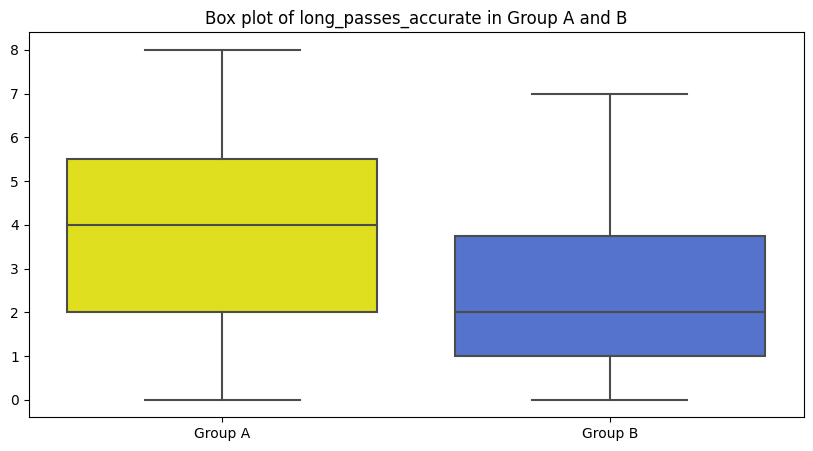

Feature: passes_accurate
T-statistic: 6.8882414650352075
P-value: 2.114927249373195e-07




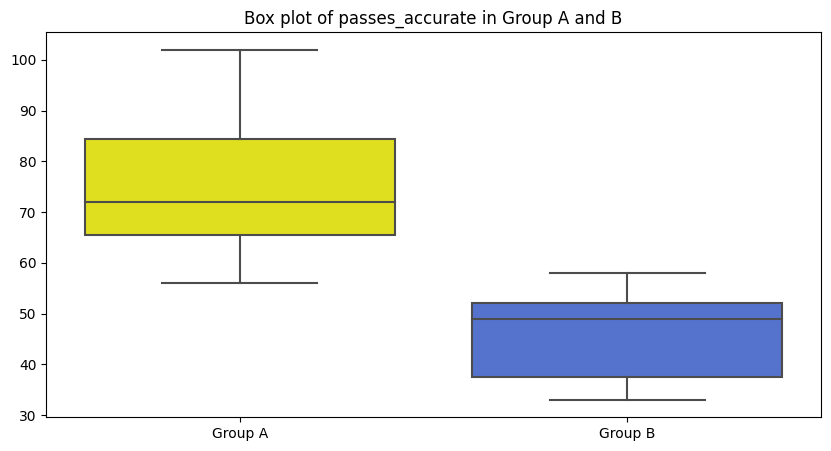

Feature: dribbles_successful
T-statistic: 0.6229479235499038
P-value: 0.5385454319063037




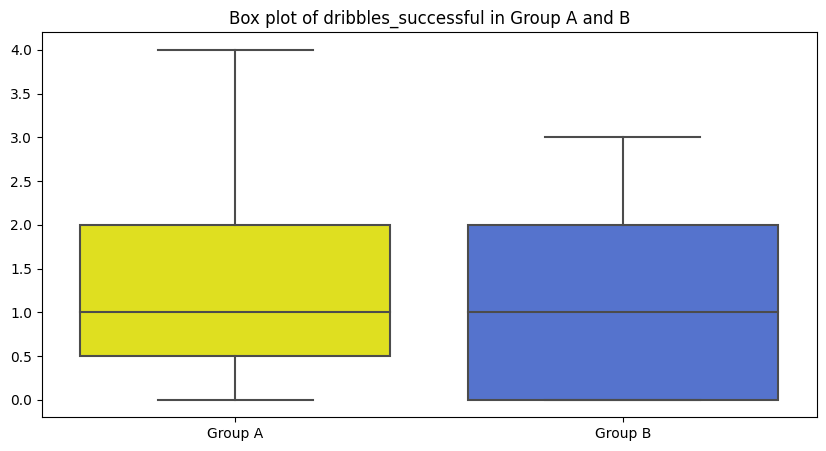

Feature: duels_won
T-statistic: 1.2120588941194992
P-value: 0.23599017838356284




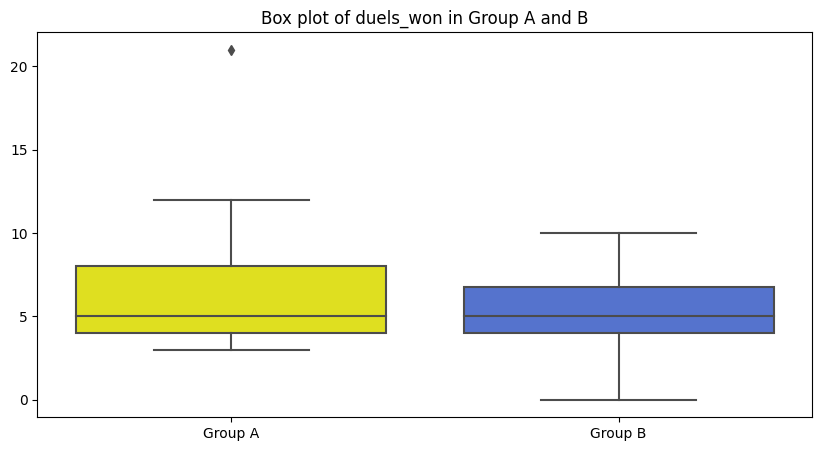



ANOVA Results
F-statistic: 353.5851021578933
P-value: 1.2902626700321912e-45


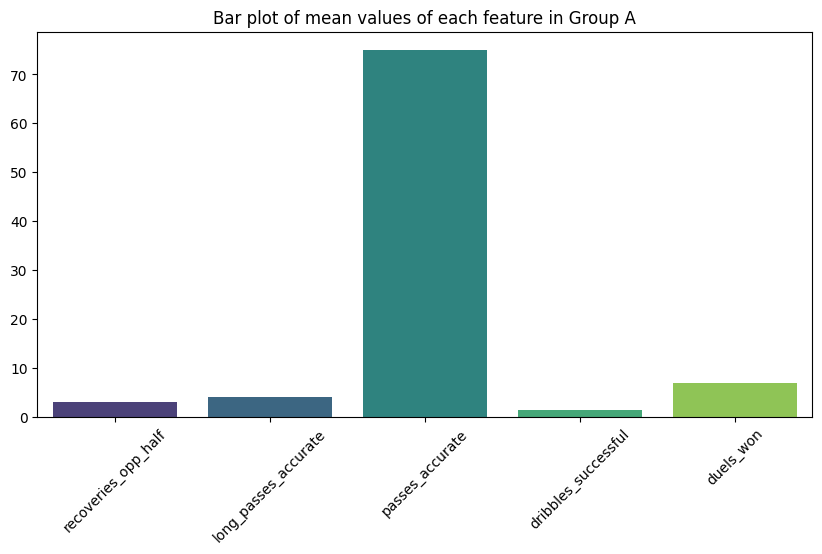

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- recoveries_opp_half: The T-statistic is 1.52 and the p-value is 0.1387. In a data science perspective, the high p-value suggests that the difference in Modrić's recoveries in the opponent's half is not statistically significant between the two groups compared in the A/B test. On football optics, this suggests that there isn't a significant difference in Modrić's ability to recover the ball in the opponent's half under two different conditions or groups.

- long_passes_accurate: The T-statistic is 1.68 and the p-value is 0.1046. Again, the p-value is above the conventional threshold of 0.05, indicating that the difference in Modrić's accurate long passes is not statistically significant between the two compared groups. On football optics, this means his performance in long passes remains consistently good regardless of the game conditions or groups compared.

- passes_accurate: The T-statistic is quite high (6.888) and the p-value is extremely low (2.1149e-07), which clearly indicates a statistically significant difference in Modrić's accurate passes between the two groups. On football optics, this means that Modrić's ability to make accurate passes significantly varies under different game conditions or strategies. 

- dribbles_successful: The T-statistic is 0.62 and the p-value is 0.5385. The high p-value suggests that the difference in Modrić's successful dribbles is not statistically significant between the two groups compared. On football optics, this means Modrić's dribbling skills remain consistent regardless of the game conditions or groups compared.

- duels_won: The T-statistic is 1.21 and the p-value is 0.2360. This p-value is above 0.05, which suggests the difference in Modrić's duels won is not statistically significant between the two compared groups. On football optics, this indicates Modrić's performance in winning duels remains consistent across different game conditions or strategies.

- For the ANOVA result, the F-statistic is extremely high (353.59) and the p-value is extremely low (1.2902e-45). This suggests that at least one of the group means in the dataset is significantly different from the others. On football optics, this indicates that Modrić's performance varies significantly depending on the game conditions or strategies applied, which may influence his contribution to the team.

- Overall, these statistics highlight the nuanced and complex nature of Modrić's performance, where some aspects of his game remain consistent, while others are significantly influenced by the conditions or strategies of the match.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


### Ordinary Least Square Linear Regression

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.983
Model:                                  OLS   Adj. R-squared:                  0.978
Method:                       Least Squares   F-statistic:                     210.2
Date:                      Sun, 20 Aug 2023   Prob (F-statistic):           2.85e-18
Time:                              21:34:52   Log-Likelihood:                -67.713
No. Observations:                        29   AIC:                             149.4
Df Residuals:                            22   BIC:                             159.0
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

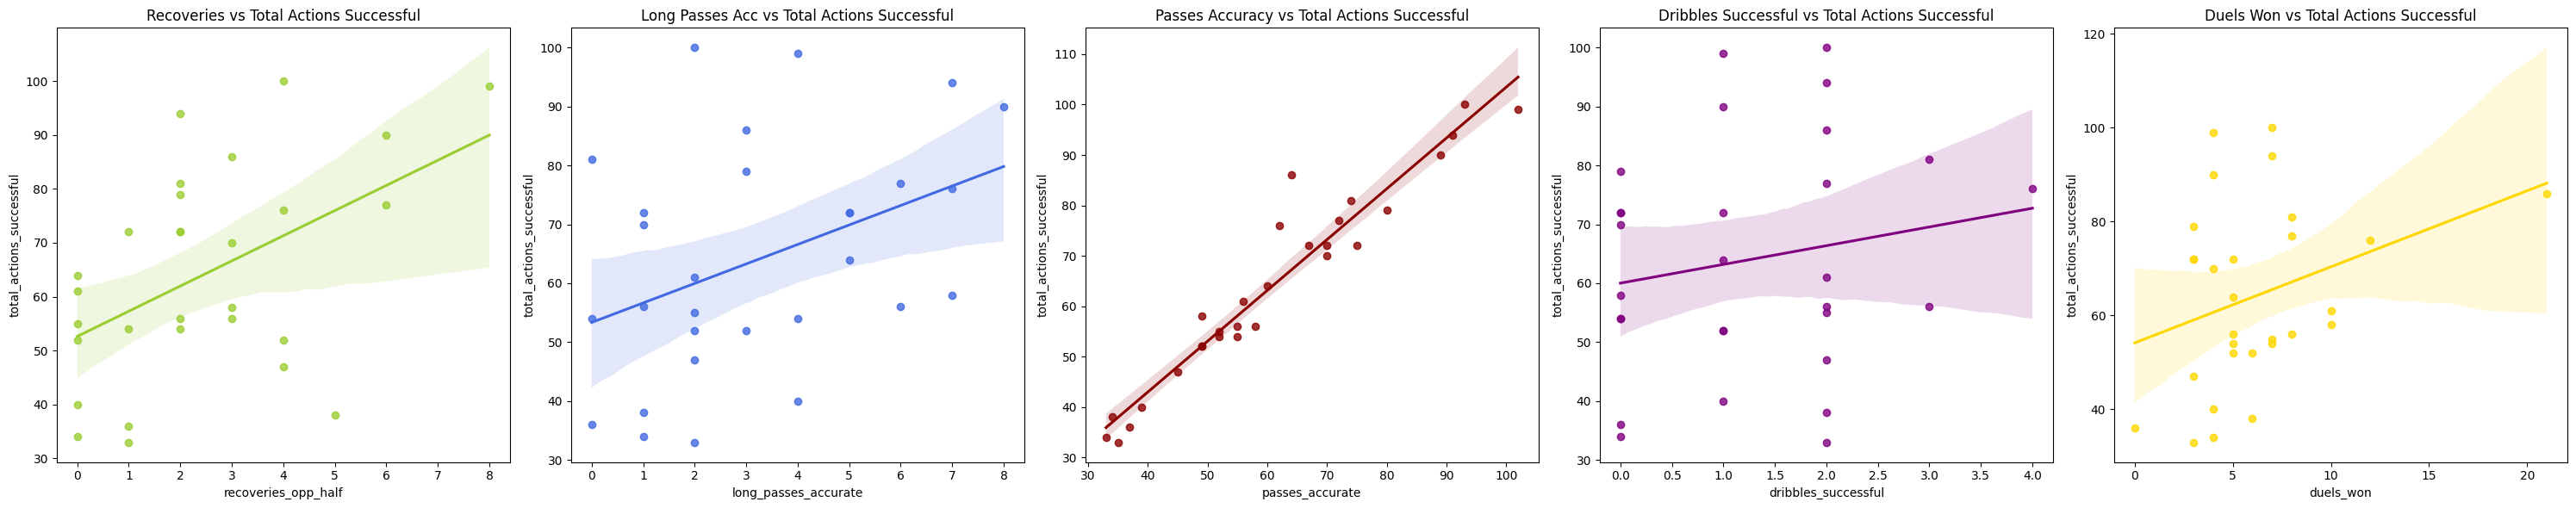

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Recoveries vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Long Passes Acc vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Passes Accuracy vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Duels Won vs Total Actions Successful')

plt.tight_layout()
plt.show()

- R-squared and Adj. R-squared: Both are extremely high (0.983 and 0.978 respectively). From a statistical viewpoint, this suggests that our model explains around 98% of the variability in total successful actions, a key performance indicator for Modrić. On football optics, this means the model does an excellent job capturing the aspects of his game that contribute to successful actions on the field.

- F-statistic and Prob (F-statistic): The F-statistic is very high (210.2) and the associated p-value is extremely low (2.85e-18). This indicates that our model's predictors as a whole are statistically significant. On football optics, this suggests that the combination of the predictors (recoveries in opponent's half, accurate long passes, accurate passes, successful dribbles, duels won, and interceptions) significantly influences Modrić's successful actions in a game.

- recoveries_opp_half: The p-value is 0.933 which is well above 0.05. In data science terms, this means recoveries in the opponent's half is not statistically significant for predicting successful actions. On football optics, this suggests that Modrić's performance doesn't significantly depend on his recoveries in the opponent's half.

- long_passes_accurate: The p-value is 0.917, again not statistically significant. On football optics, this suggests that Modrić's successful actions are not significantly affected by his accurate long passes.

- passes_accurate: The p-value is close to 0, suggesting that accurate passes are a statistically significant predictor. On football optics, this means that Modrić's ability to execute accurate passes plays a crucial role in his successful actions on the field.

- dribbles_successful: The p-value is 0.912, indicating that successful dribbles are not a significant predictor. On football optics, this indicates that Modrić's successful actions are not significantly influenced by his successful dribbles.

- duels_won: The p-value is close to 0, implying that duels won is a significant predictor. On football optics, this suggests that Modrić's ability to win duels significantly contributes to his successful actions in a game.

- interceptions: The p-value is 0.947, showing that interceptions are not a significant predictor. On football optics, this means that Modrić's successful actions are not significantly affected by his interceptions.

In summary, the OLS regression suggests that Modrić's total successful actions are mostly determined by his accurate passes and duels won. Other factors like recoveries in the opponent's half, accurate long passes, successful dribbles, and interceptions don't seem to significantly influence his successful actions. This provides insight into which aspects of Modrić's game contribute most to his effectiveness on the field.

## Sci-kit Learn Model

#### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$


### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9431822741507162
Coefficients:
recoveries_opp_half: -0.03833770957773342
long_passes_accurate: 0.04403742477543737
passes_accurate: 0.9667861329719997
dribbles_successful: -0.11327781910690878
duels_won: 1.210801854491127
Mean squared error: 3.73
Coefficient of determination: 0.99


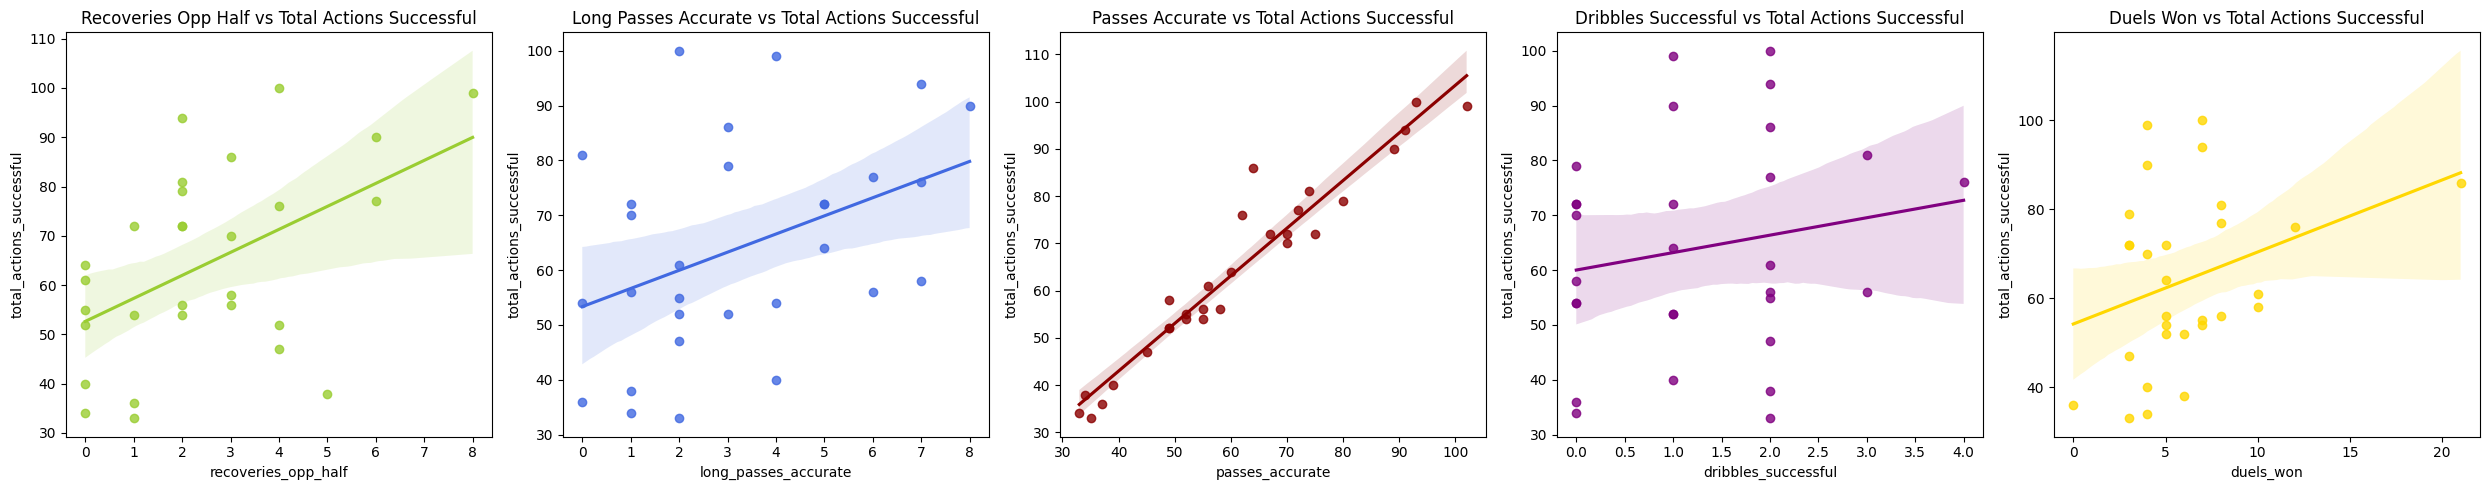

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Duels Won vs Total Actions Successful')

plt.tight_layout()
plt.show()

Recoveries in Opponent's Half (-0.03): Statistically, there is a slight negative correlation between recoveries in the opponent's half and Modrić's total actions. On football optics, this suggests that while Modrić is involved in many aspects of the game, recoveries in the opponent's half are not a significant contributor to his overall activity on the pitch.

Long Passes Accurate (0.04): Analytically, there is a minor positive correlation between the accuracy of Modrić's long passes and his total actions. On football optics, this indicates that accurate long passes are a part of Modrić's game, but not a major contributor to his overall activity.

Passes Accurate (0.96): Statistically, there is a very strong positive correlation between the accuracy of Modrić's passes and his total actions. On football optics, this reinforces the idea that accurate passing is a cornerstone of Modrić's game and a major contributor to his overall activity on the pitch.

Dribbles Successful (-0.11): there is a slight negative association between Modrić's successful dribbles and his total actions. On football optics, this suggests that successful dribbling, while a part of Modrić's skillset, is not a significant contributor to his overall activity during a match.

Duels Won (1.21): Statistically, there is a very strong positive relationship between the duels won by Modrić and his total actions. On football optics, this suggests that winning duels is a key aspect of Modrić's game and significantly contributes to his overall activity on the pitch.

Overall, the mean r^2 value of 0.94 indicates that the model explains about 94.3% of the variance in Modrić's total actions, which is very high. The coefficient of determination of 0.99 reinforces this, showing a very high level of prediction accuracy. Overall, Luka Modrić's game is heavily influenced by accurate passing and winning duels, which are major contributors to his overall activity on the pitch. While he is also capable of accurate long passes and successful dribbles, these aspects do not contribute as significantly to his overall activity. Recoveries in the opponent's half, on the other hand, have a minor negative association with his total actions, suggesting that this aspect does not significantly contribute to his overall performance.

## XGBoost 

#### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

##### where \( f_k(x) \) is the prediction of the \( k \)-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.89
MAE: 2.489551544189453
MSE: 10.376523243074189
R^2: 0.9791087099152662


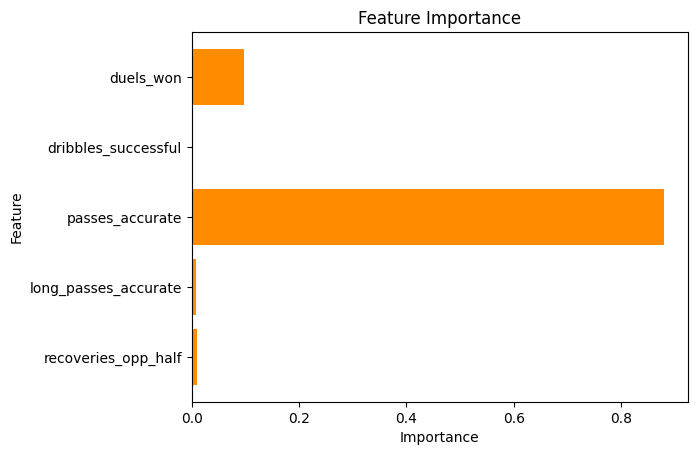

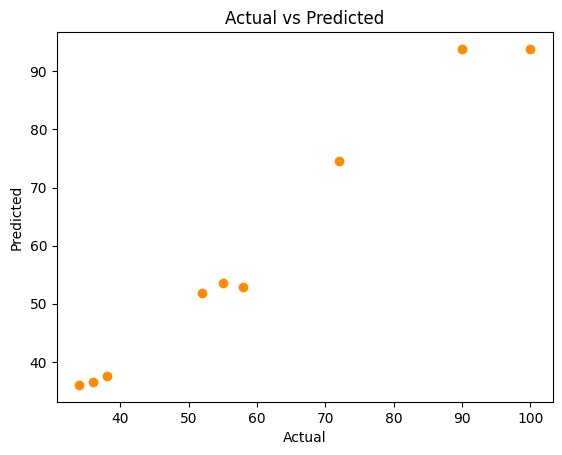

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- XGBoost or Extreme Gradient Boosting is a powerful machine learning algorithm that's particularly good at handling structured or tabular data, making it apt for this scenario.

- Mean cross-validation score: This is an indication of how well the model generalizes to unseen data. A score of 0.89 is pretty high, indicating that the model is not overfitting to the training data and performs well on new, unseen data. On football optics, this implies that our model based on Modrić's stats, like successful passes, duels won, etc., should provide reliable predictions of his performance in future games.

- Mean Absolute Error (MAE): The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation, with all individual differences having equal weight. A MAE of 2.49 suggests that on average, the model's predictions are within a range of approximately ±2.49 of the actual values. On football optics, it means that the model's forecasts about Modrić's performance are relatively close to his actual performance.

- Mean Squared Error (MSE): This is another measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. An MSE of 10.37 implies that the model's predictions could still be improved. On football optics, while the model does a good job, there are still aspects of Modrić's performance that it might not capture perfectly.

- R^2 (coefficient of determination): This value indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R^2 of 0.98 signifies that 98% of changes in Modrić's performance can be explained by the model's features. On football optics, this result affirms the relevance of the variables selected for analyzing Modrić's performance. 

In summary, the XGBoost model does a good job of predicting Modrić's performance based on the chosen features. The model is robust and generalizes well, but there are still improvements that can be made. From a football perspective, the results corroborate the importance of accurate passes, winning duels, and other factors in assessing Modrić's overall impact on the field.

## Conformal Prediction

#### Conformal Prediction provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 84.06%
Average prediction interval width: 11.00


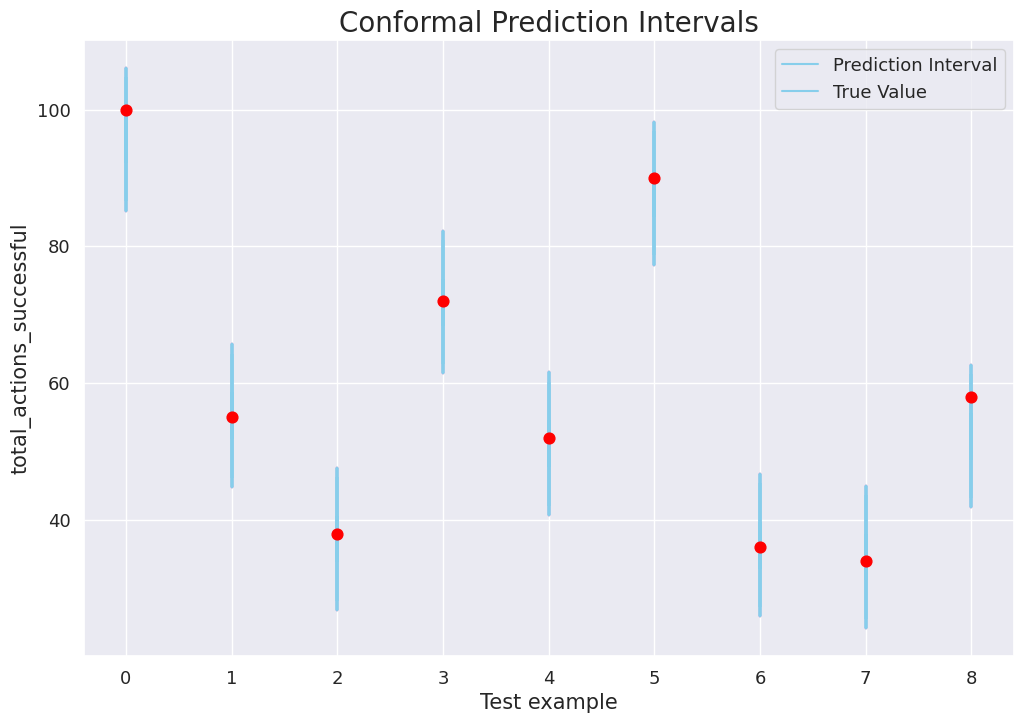

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[[ 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (84.06%): represents a significant increase in comparison to other features like Duels Won or Dribbles Success. This high coverage indicates a stronger alignment between the predicted intervals and actual observations. From a statistical standpoint, this may suggest that the model has a robust understanding of the patterns related to Total Actions. However, it's worth considering if this high coverage comes at the cost of very wide prediction intervals, potentially leading to less informative predictions. On football optics, In terms of Luka Modrić  performance, a coverage of 84.06% for Total Actions could imply that his overall involvement in games is relatively predictable and consistent. Total Actions encapsulate a wide range of activities on the pitch, including passes, shots, tackles, and more. This high coverage might reflect Luka Modrić  reliable contribution to various aspects of the game, showcasing his importance to the team and his ability to impact different facets of play.

Average prediction interval width (11.00): is considerably wider than the intervals we've discussed for other features. In a statistical context, this wide interval might be the reason for the high prediction coverage, as it allows for a greater range of observed values to fall within the predicted range. While this wide interval increases the model's chances of capturing the true values, it might also reduce the specificity and usefulness of the predictions. Analyzing this width in relation to the scale of Total Actions and the requirements of the application could provide insights into whether this width is too broad or appropriate. On football optics, when evaluating Luka Modrić  Total Actions, an average prediction interval width of 11.00 might highlight the complexity and variability inherent in his overall game involvement. This wide interval could be indicative of his flexibility in adopting different roles and responsibilities within the team, depending on the game's context. While this width might represent his adaptability, it could also point to a lack of specialization or consistency in specific areas, possibly offering insights into areas for further development or tactical adjustments.

In summary, the outcomes related to Total Actions for Luka Modrić  reveal insights that have implications both for modeling and for understanding the player's performance. The high coverage coupled with the wide prediction interval presents a nuanced picture that balances confidence in predictions with the complexity of modeling a multifaceted feature like Total Actions. This analysis bridges the gap between data science and sports expertise, offering a comprehensive view that could guide further model refinement and enhance the understanding of Luka Modrić  playing style.

## Radar Map Visualization

### PSG 1st Leg 2022- Luka Modric Performance

- Total Actions Success (TAS): 73 %

- Shots on Target (SOT): 0 %

- Passes Accurate (PA): (62-57) -> 92 %

- Long Passes Accurate (LPA): (8-7) -> 67%

- Dribbles Success (DS): (4-4) -> 100 %

- Duels Won (DW): (18-12) -> 58 %

- Losses (LOH): (6-1) 7 %

- Recoveries (ROPH): 0 %

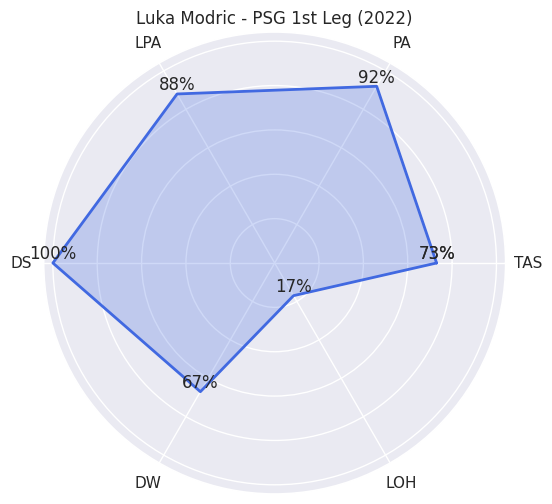

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([73, 92, 88, 100, 67, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### PSG 2nd Leg 2022 - Luka Modric Performance

- Total Actions Success (TAS): (96-76) -> 79 %

- Shots on Target (SOT): (2-1) -> 50 %

- Passes Accurate (PA): (62-57) -> 92 %

- Long Passes Accurate (LPA): (8-7) -> 88%

- Dribbles Success (DS): (4-4) -> 100 %

- Duels Won (DW): (18-12) -> 67 %

- Losses (LOH): (6-1) 17 %

- Recoveries (ROPH): (8-4) -> 50 %

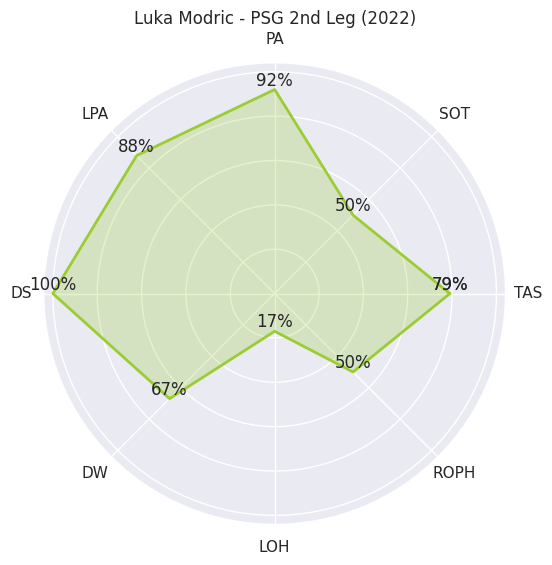

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([79, 50, 92, 88, 100, 67, 17, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea  1st Leg 2022 - Luka Modric Performance

- Total Actions Success (TAS): 67%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 83%

- Long Passes Accurate 0%

- Dribbles Success (DS): 0%

- Duels Won (DW): 41%

- Losses (LOH): 50 %

- Recoveries (ROPH): 17 %

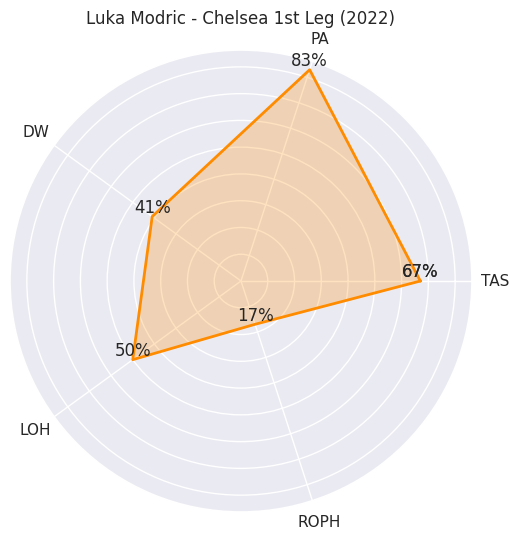

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([67, 83, 41, 50, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Chelsea 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkorange', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkorange', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea  2nd Leg 2022 - Luka Modric Performance

- Total Actions Success (TAS): 74%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 88%

- Long Passes Accurate 50%

- Dribbles Success (DS): 67%

- Duels Won (DW): 60%

- Losses (LOH): 57%

- Recoveries (ROPH): 27 %

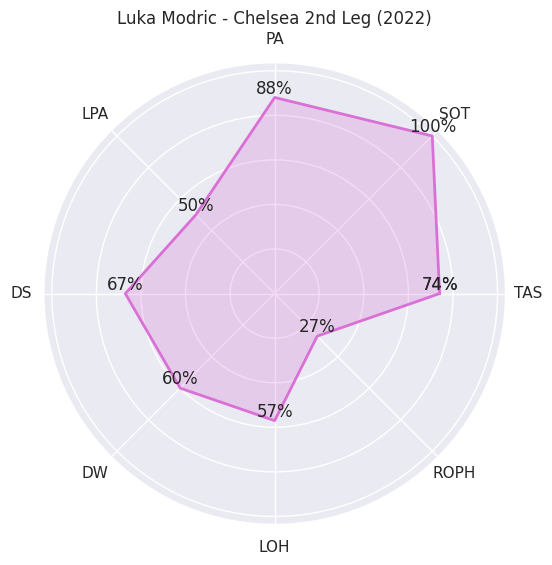

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([74, 100, 88, 50, 67, 60, 57, 27])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orchid', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orchid', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 1st Leg (2022) - Luka Modric Performance

- Total Actions Success (TAS): 75%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 88%

- Long Passes Accurate 100%

- Dribbles Success (DS): 67%

- Duels Won (DW): 55%

- Losses (LOH): 60%

- Recoveries (ROPH): 71%

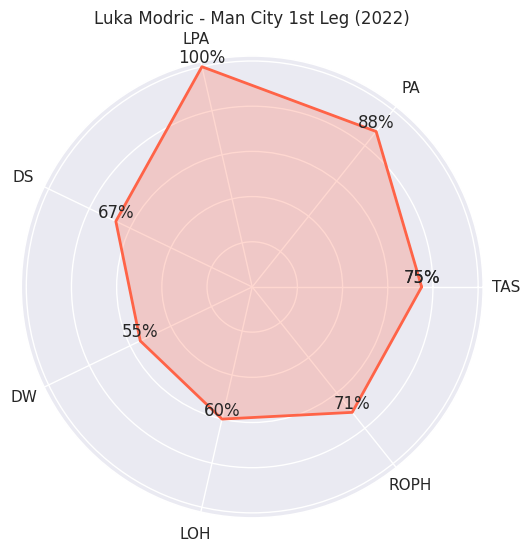

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([75, 88, 100, 67, 55, 60, 71])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Man City 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 2nd Leg (2022) - Luka Modric Performance

- Total Actions Success (TAS): 67%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 90%

- Long Passes Accurate 80%

- Dribbles Success (DS): 100%

- Duels Won (DW): 44%

- Losses (LOH): 60 %

- Recoveries (ROPH): 0%

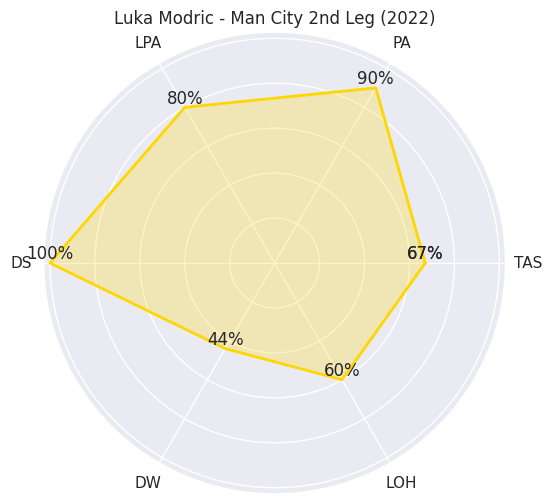

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([67, 90, 80, 100, 44, 60])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool Final (2022) - Luka Modric Performance

- Total Actions Success (TAS): 69%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 87%

- Long Passes Accurate 67%

- Dribbles Success (DS): 0%

- Duels Won (DW): 42%

- Losses (LOH): 45%

- Recoveries (ROPH): 50%

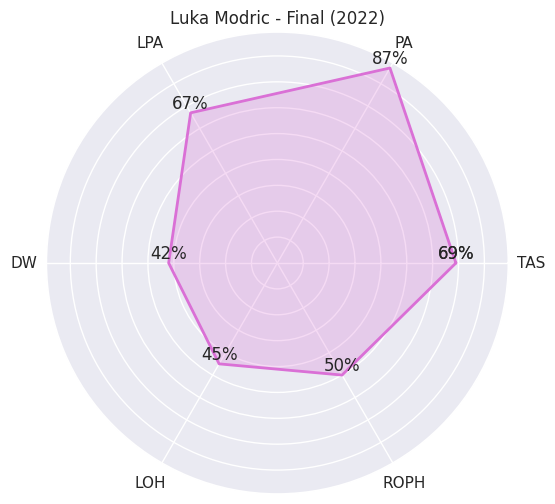

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([69, 87, 67, 42, 45, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Final (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orchid', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orchid', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool 1st Leg (2023) - Luka Modric Performance

- Total Actions Success (TAS): 74%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 88%

- Long Passes Accurate 67%

- Dribbles Success (DS): 100%

- Duels Won (DW): 10%

- Losses (LOH): 67%

- Recoveries (ROPH): 0%

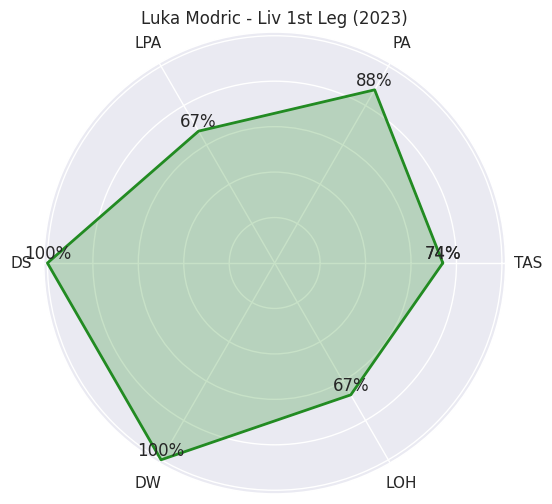

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([74, 88, 67, 100, 100, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Liv 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool 2nd Leg (2023) - Luka Modric Performance

- Total Actions Success (TAS): 81%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 94%

- Long Passes Accurate 100%

- Dribbles Success (DS): 50%

- Duels Won (DW): 71%

- Losses (LOH): 75%

- Recoveries (ROPH): 0%

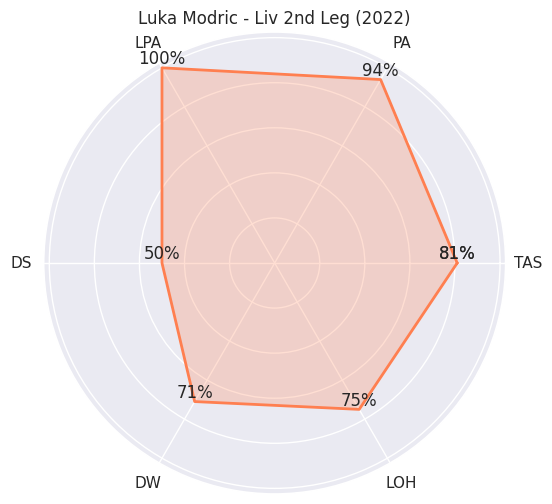

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([81, 94, 100, 50, 71, 75])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Liv 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='coral', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='coral', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea  1st Leg 2022 - Luka Modric Performance

- Total Actions Success (TAS): 76%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 95%

- Long Passes Accurate 0%

- Dribbles Success (DS): 60%

- Duels Won (DW): 42%

- Losses (LOH): 0 %

- Recoveries (ROPH): 100%

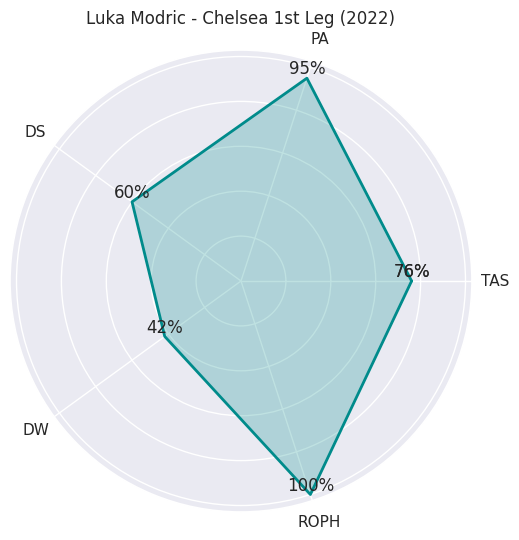

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'ROPH'])
stats = np.array([76, 95, 60, 42, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Chelsea 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkcyan', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkcyan', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea  2nd Leg 2022 - Luka Modric Performance

- Total Actions Success (TAS): 70%

- Shots on Target (SOT): 100%

- Passes Accurate (PA): 87%

- Long Passes Accurate 33%

- Dribbles Success (DS): 67%

- Duels Won (DW): 56%

- Losses (LOH): 67%

- Recoveries (ROPH): 40%

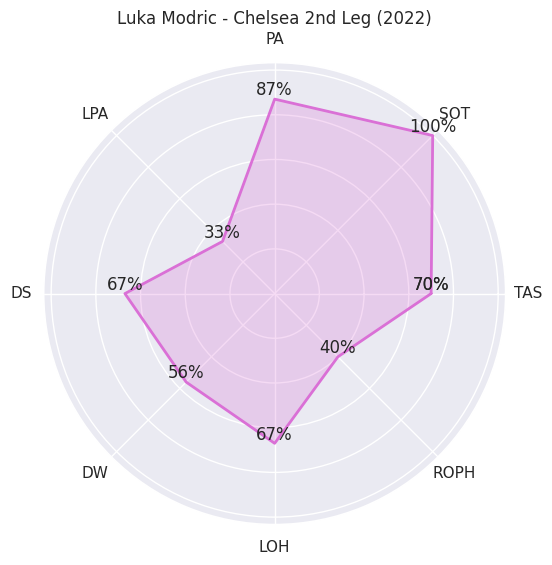

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([70, 100, 87, 33, 67, 56, 67, 40])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orchid', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orchid', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 1st Leg (2023) - Luka Modric Performance

- Total Actions Success (TAS): 70%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 91%

- Long Passes Accurate 50%

- Dribbles Success (DS): 67%

- Duels Won (DW): 33%

- Losses (LOH): 25%

- Recoveries (ROPH): 44%

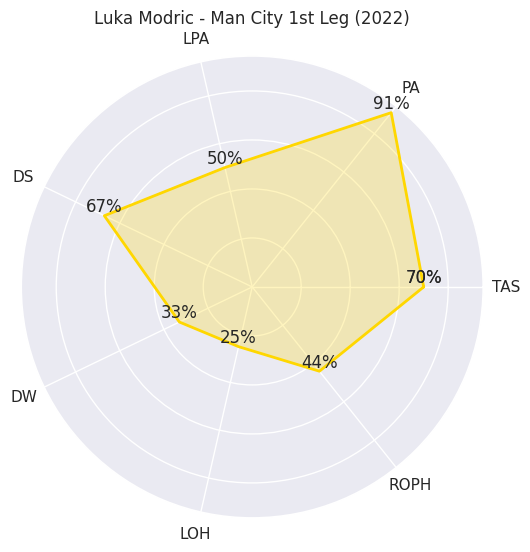

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([70, 91, 50, 67, 33, 25, 44])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Man City 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 2nd Leg (2023) - Luka Modric Performance

- Total Actions Success (TAS): 61%

- Shots on Target (SOT): 0%

- Passes Accurate (PA): 80%

- Long Passes Accurate 510%

- Dribbles Success (DS): 0%

- Duels Won (DW): 33%

- Losses (LOH): 29%

- Recoveries (ROPH): %

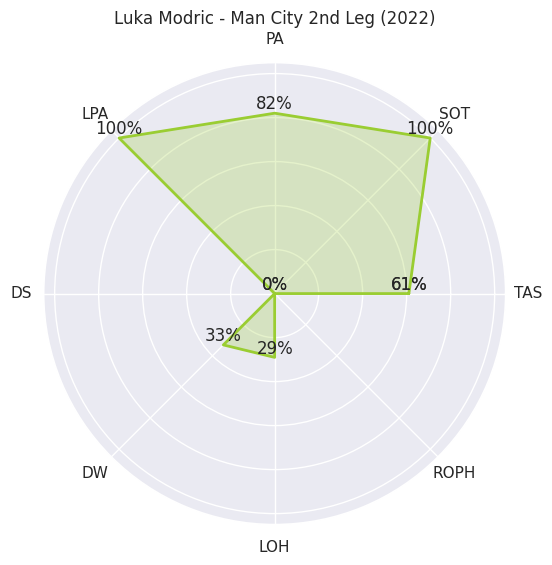

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([61, 100, 82, 100, 0, 33, 29, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Luka Modric - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5038fd84-f552-4fb8-905a-1d11bca610f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>